In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Add the directory to the path so we can import the r-t modules
import sys
import os


#Add the src/radiation directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src', 'radiation')))

#Importing the Radiation class
import radiative_transfer_paul as rt

Comparing dust extinction properties...

Comparing dust scale heights...

Comparing dust scattering properties...


C:\Users\Mirie\planetary_remote_sensing\planetary_remote_sensing\src\radiation\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


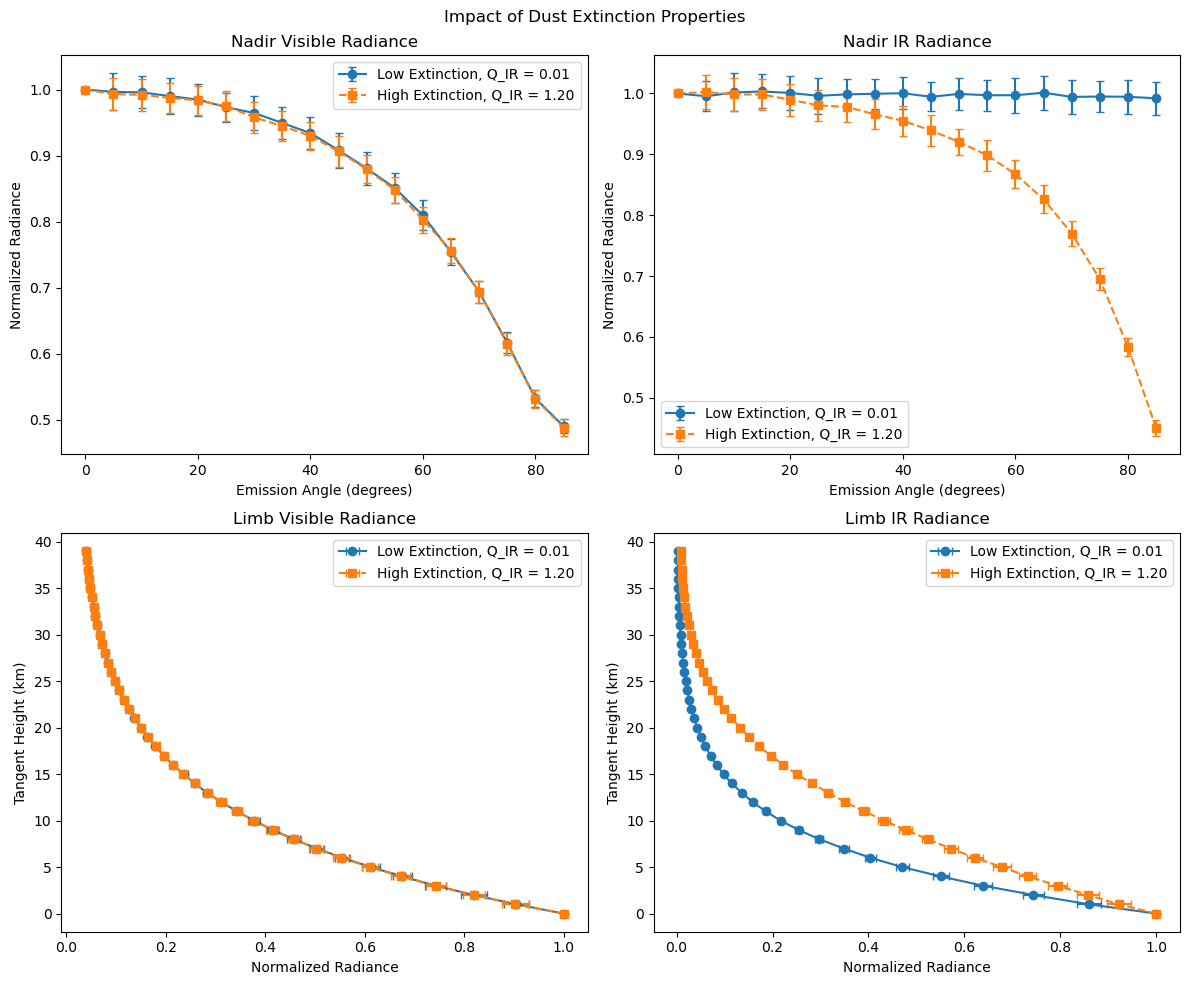

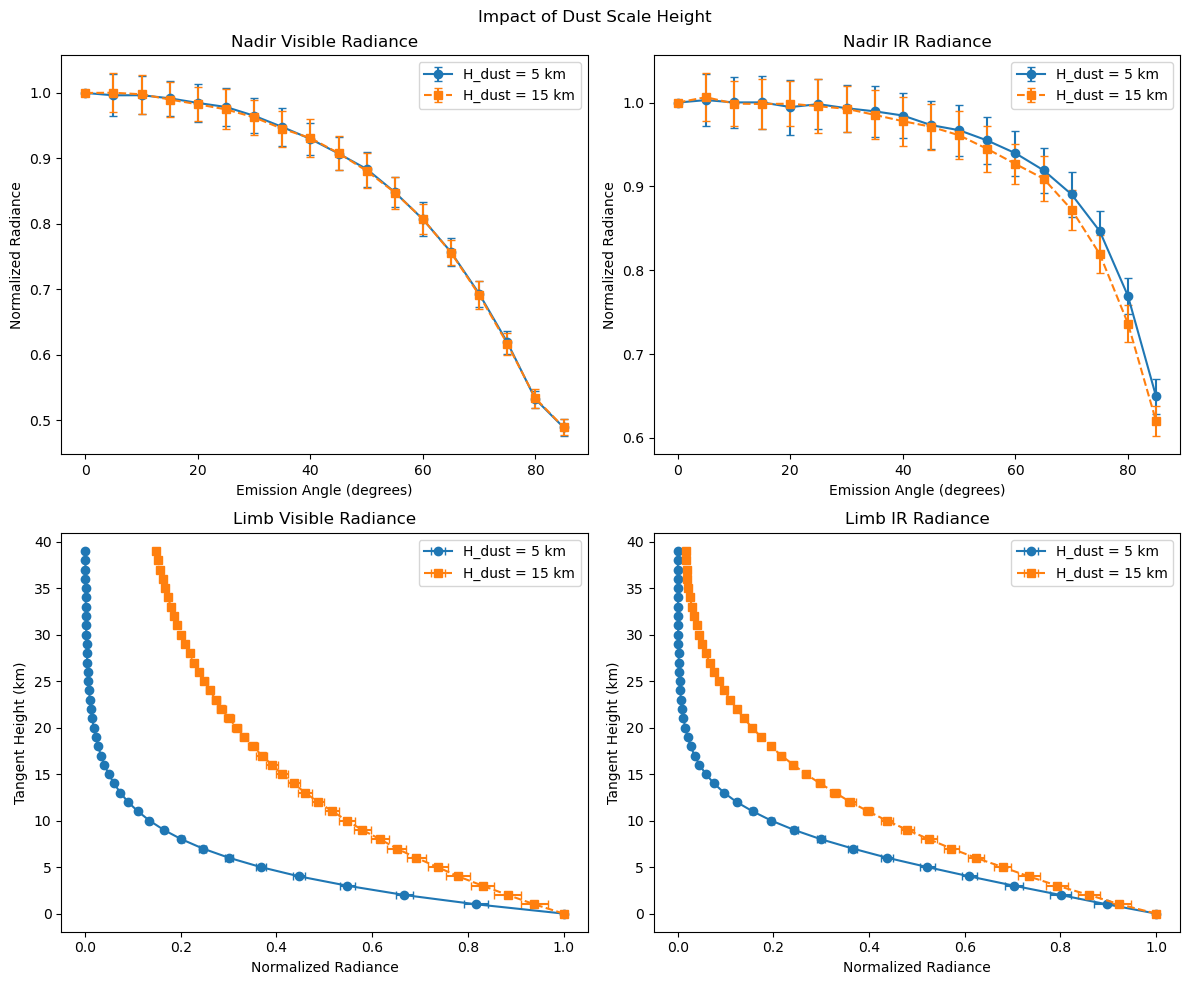

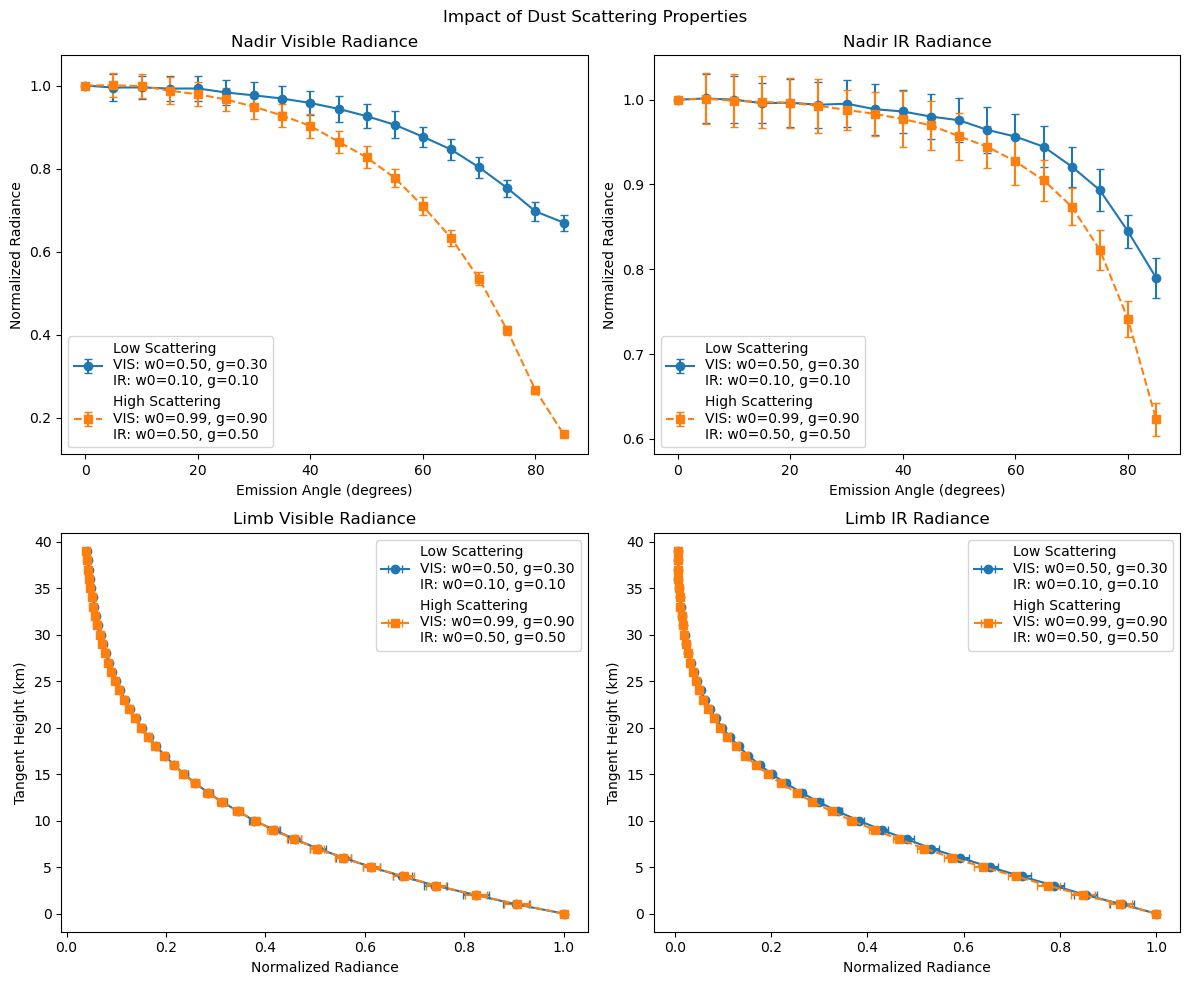

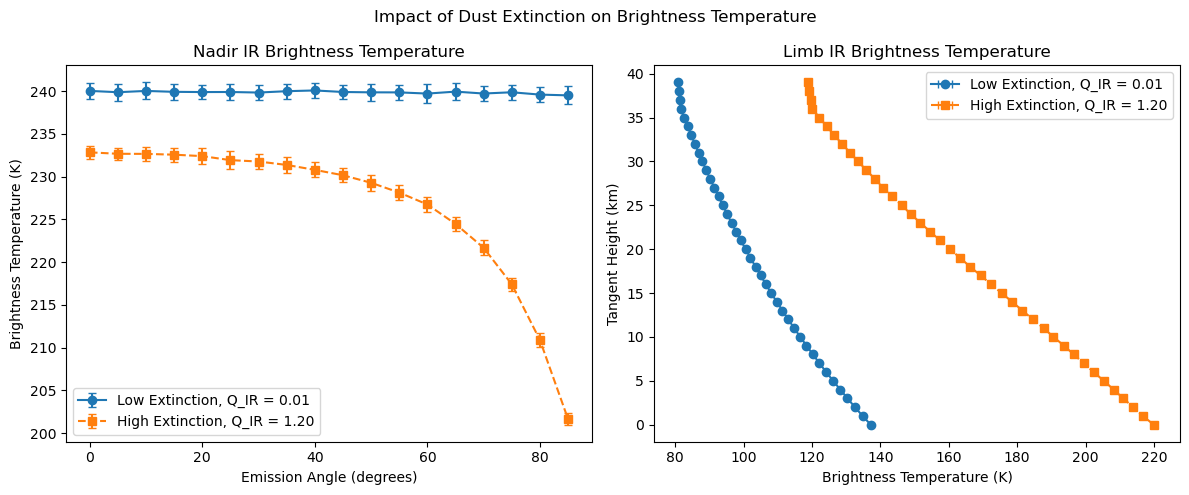

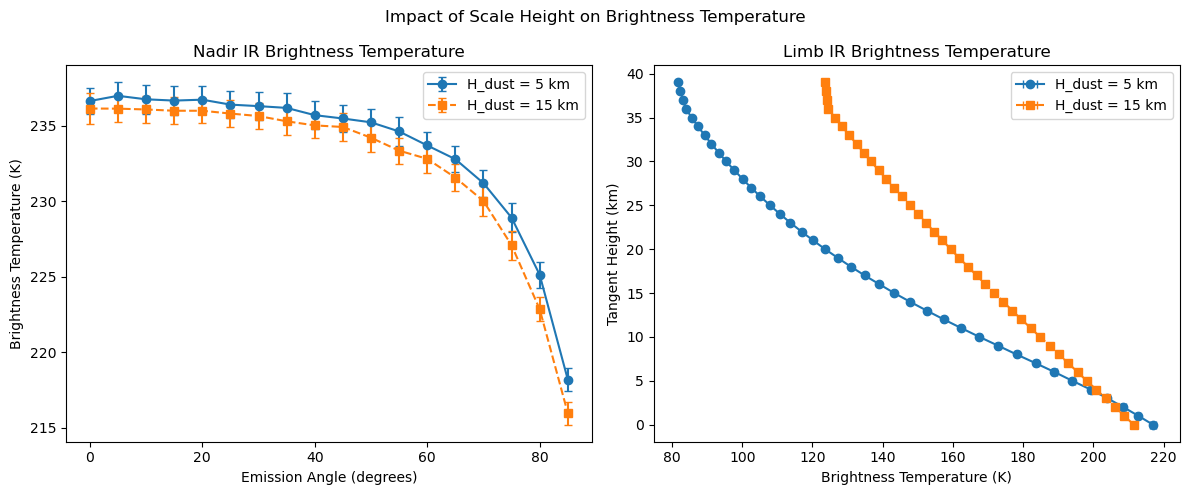

In [20]:
"""
Mars Atmosphere Parameter Sensitivity Study
----------------------------------------
Explores how different dust and atmospheric parameters affect remote sensing observations.

Uses the MarsSyntheticData class to generate synthetic observations of Mars with different
dust properties.
"""

import numpy as np
import matplotlib.pyplot as plt

# Import our modules
from mars_synthetic_data import (MarsSyntheticData, plot_comparison, plot_brightness_temps)

# Parameter sensitivity studies
try:
    # 1. Impact of dust extinction properties
    print("Comparing dust extinction properties...")
    Q_ext_ir_LOW = 0.01 # Q_ext is extinction efficiency
    Q_ext_ir_HIGH = 1.2
    mars_obs_low_ext = MarsSyntheticData(Q_ext_vis=2.0, Q_ext_ir=Q_ext_ir_LOW)
    mars_obs_high_ext = MarsSyntheticData(Q_ext_vis=2.0, Q_ext_ir=Q_ext_ir_HIGH)

    fig1 = plot_comparison(mars_obs_low_ext, mars_obs_high_ext,
                          'Low Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_LOW), 
                          'High Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_HIGH),
                          'Impact of Dust Extinction Properties')

    # 2. Impact of dust scale height
    print("\nComparing dust scale heights...")
    H_dust_LOW = 5e3  # 5 km scale height
    H_dust_HIGH = 15e3  # 15 km scale height
    mars_obs_low_h = MarsSyntheticData(H_dust=H_dust_LOW)
    mars_obs_high_h = MarsSyntheticData(H_dust=H_dust_HIGH)

    fig2 = plot_comparison(mars_obs_low_h, mars_obs_high_h,
                          'H_dust = {} km'.format(int(H_dust_LOW/1e3)), 
                          'H_dust = {} km'.format(int(H_dust_HIGH/1e3)),
                          'Impact of Dust Scale Height')

    # 3. Impact of dust scattering properties
    print("\nComparing dust scattering properties...")
    # Define scattering parameters for both visible and IR
    w0_vis_LOW = 0.5 #w0 is single-scattering albedo
    w0_vis_HIGH = 0.99
    w0_ir_LOW = 0.1
    w0_ir_HIGH = 0.5
    g_vis_LOW = 0.3 #g is asymmetry parameter
    g_vis_HIGH = 0.9
    g_ir_LOW = 0.1
    g_ir_HIGH = 0.5

    mars_obs_low_scat = MarsSyntheticData(
        single_scatter_albedo_vis=w0_vis_LOW,
        single_scatter_albedo_ir=w0_ir_LOW,
        asymmetry_parameter_vis=g_vis_LOW,
        asymmetry_parameter_ir=g_ir_LOW
    )
    
    mars_obs_high_scat = MarsSyntheticData(
        single_scatter_albedo_vis=w0_vis_HIGH,
        single_scatter_albedo_ir=w0_ir_HIGH,
        asymmetry_parameter_vis=g_vis_HIGH,
        asymmetry_parameter_ir=g_ir_HIGH
    )

    fig3 = plot_comparison(
        mars_obs_low_scat, mars_obs_high_scat,
        'Low Scattering\nVIS: w0={:.2f}, g={:.2f}\nIR: w0={:.2f}, g={:.2f}'.format(
            w0_vis_LOW, g_vis_LOW, w0_ir_LOW, g_ir_LOW), 
        'High Scattering\nVIS: w0={:.2f}, g={:.2f}\nIR: w0={:.2f}, g={:.2f}'.format(
            w0_vis_HIGH, g_vis_HIGH, w0_ir_HIGH, g_ir_HIGH),
        'Impact of Dust Scattering Properties'
    )

    # Plot brightness temperature comparisons
    fig4 = plot_brightness_temps(mars_obs_low_ext, mars_obs_high_ext,
                               'Low Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_LOW),
                               'High Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_HIGH),
                               'Impact of Dust Extinction on Brightness Temperature')

    fig5 = plot_brightness_temps(mars_obs_low_h, mars_obs_high_h,
                               'H_dust = {} km'.format(int(H_dust_LOW/1e3)),
                               'H_dust = {} km'.format(int(H_dust_HIGH/1e3)),
                               'Impact of Scale Height on Brightness Temperature')

    plt.show()

except Exception as e:
    print(f"Error in parameter study: {str(e)}")
    raise